21040101027
BATUHAN BARTU
MAKİNE ÖĞRENMESİ
ÖĞRETİM GÖREVLİSİ: GÖKALP TULUM
TOPKAPI ÜNİVERSİTESİ
MÜHENDİSLİK FAKÜLTESİ
BİLGİSAYAR MÜHENDİSLİĞİ

# **Veri Seti ve Gerekli Kütüphaneleri Yükleme**

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [44]:
data = pd.read_csv("pima-indians-diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### **Normalizasyon İşlemi**

In [45]:
# Hedef değişkeni ayrı bir değişkene atıyoruz
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Min-max normalizasyonu
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Normalizasyon sonrası veri seti
normalizedDf = pd.DataFrame(X_normalized, columns=X.columns)
normalizedDf['Outcome'] = y
# 'Outcome' sütununu ekleyerek normalizasyon sonrası veri setini oluşturdm
normalizedDf['Outcome'] = y

# Normalized veri setini kontrol etme
print(normalizedDf)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetespedigreeFunction       Age

### **Naive Bayes Sınıflandırıcısı**

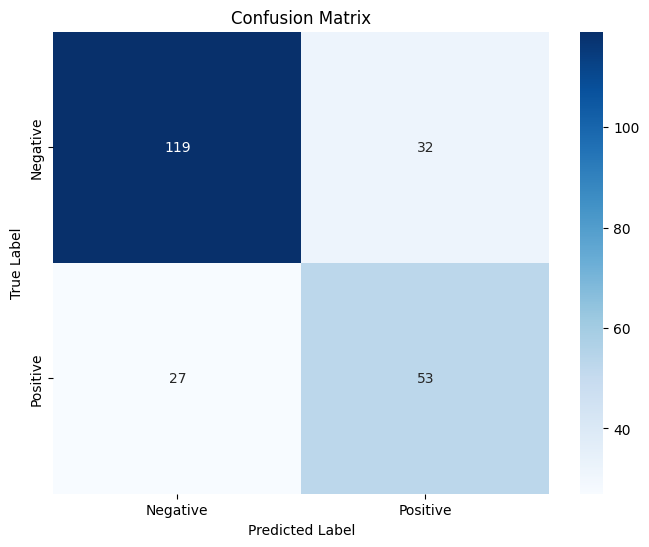

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Accuracy: 0.7445887445887446
Sensitivity (True Positive Rate): 0.6625
Specificity (True Negative Rate): 0.7880794701986755


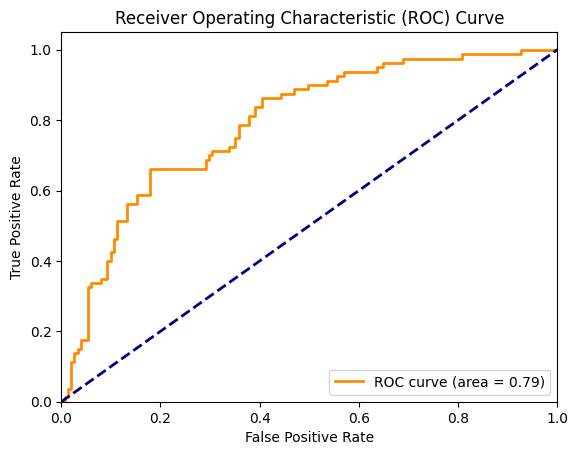

In [46]:
# Veri setini %70 eğitim ve %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturma ve eğitme
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test veri seti üzerinde tahminler yapma
y_pred = nb_model.predict(X_test)

# Confusion matrix oluşturma ve görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma raporu oluşturma
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Accuracy hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Sensitivity (True Positive Rate) hesaplama
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print("Sensitivity (True Positive Rate):", sensitivity)

# Specificity (True Negative Rate) hesaplama
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity (True Negative Rate):", specificity)

# ROC eğrisi ve AUC skoru hesaplama
roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



* **True Negative (TN):** 119 - Gerçek negatif örneklerin doğru olarak negatif tahmin edildiği durum.

* **False Positive (FP):** 32 - Gerçek negatif örneklerin yanlış olarak pozitif tahmin edildiği durum.

* **False Negative (FN):** 27 - Gerçek pozitif örneklerin yanlış olarak negatif tahmin edildiği durum.

* **True Positive (TP):** 53 - Gerçek pozitif örneklerin doğru olarak pozitif tahmin edildiği durum.

Classification Report:
Sınıf 0 (Negatif Sınıf) İçin:
Precision (0.82): Negatif olarak tahmin edilen örneklerin %82'si gerçekten negatif. Model, negatif tahmin yaparken yüksek doğrulukla çalışıyor.
Recall (0.79): Gerçek negatif örneklerin %79'u doğru olarak negatif tahmin edilmiş. Negatif sınıfı tespit etmede model oldukça başarılı.
F1-Score (0.80): Precision ve recall'un harmonik ortalaması olan F1-Score, modelin negatif sınıfı tahmin ederken dengeli bir performans sergilediğini gösterir.
Support (151): Negatif sınıfa ait toplam örnek sayısı.

Sınıf 1 (Pozitif Sınıf) İçin:
Precision (0.62): Pozitif olarak tahmin edilen örneklerin %62'si gerçekten pozitif. Model, pozitif tahminlerde daha fazla hata yapıyor.
Recall (0.66): Gerçek pozitif örneklerin %66'sı doğru olarak pozitif tahmin edilmiş. Pozitif sınıfı tespit etmede model yeterli, ancak geliştirilmesi gerekiyor.
F1-Score (0.64): Precision ve recall'un harmonik ortalaması olan F1-Score, pozitif sınıfı tahmin ederken modelin daha düşük bir performans sergilediğini gösterir.
Support (80): Pozitif sınıfa ait toplam örnek sayısı.

Genel accuracy %74, modelin doğru tahmin oranının makul seviyede olduğunu gösteriyor. Özellikle, negatif sınıf için yüksek precision (%82) ve recall (%79) değerleri, modelin negatif örnekleri iyi tanımladığını gösteriyor.

Sensitivity (0.66): Modelin pozitif sınıfı doğru tahmin etme oranı.
Specificity (0.79): Modelin negatif sınıfı doğru tahmin etme oranı.

Genel doğruluk oranı %74 olup, modelin makul bir performans sergilediğini söyleyebiliriz. 


Classification Report:
Sınıf 0 (Negatif Sınıf) İçin:
Precision (0.82): Negatif olarak tahmin edilen örneklerin %82'si gerçekten negatif. Model, negatif tahmin yaparken yüksek doğrulukla çalışıyor.
Recall (0.79): Gerçek negatif örneklerin %79'u doğru olarak negatif tahmin edilmiş. Negatif sınıfı tespit etmede model oldukça başarılı.
F1-Score (0.80): Precision ve recall'un harmonik ortalaması olan F1-Score, modelin negatif sınıfı tahmin ederken dengeli bir performans sergilediğini gösterir.
Support (151): Negatif sınıfa ait toplam örnek sayısı.

Sınıf 1 (Pozitif Sınıf) İçin:
Precision (0.62): Pozitif olarak tahmin edilen örneklerin %62'si gerçekten pozitif. Model, pozitif tahminlerde daha fazla hata yapıyor.
Recall (0.66): Gerçek pozitif örneklerin %66'sı doğru olarak pozitif tahmin edilmiş. Pozitif sınıfı tespit etmede model yeterli, ancak geliştirilmesi gerekiyor.
F1-Score (0.64): Precision ve recall'un harmonik ortalaması olan F1-Score, pozitif sınıfı tahmin ederken modelin daha düşük bir performans sergilediğini gösterir.
Support (80): Pozitif sınıfa ait toplam örnek sayısı.

Genel accuracy %74, modelin doğru tahmin oranının makul seviyede olduğunu gösteriyor. Özellikle, negatif sınıf için yüksek precision (%82) ve recall (%79) değerleri, modelin negatif örnekleri iyi tanımladığını gösteriyor.

Sensitivity (0.66): Modelin pozitif sınıfı doğru tahmin etme oranı.
Specificity (0.79): Modelin negatif sınıfı doğru tahmin etme oranı.

Genel doğruluk oranı %74 olup, modelin makul bir performans sergilediğini söyleyebiliriz. 

## *Naive Bayes Optimizasyonu*

En iyi parametreler: {'var_smoothing': 0.533669923120631}


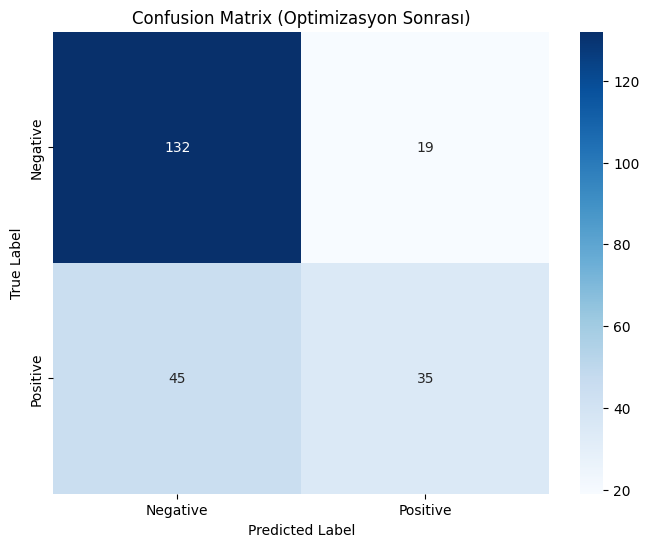

Classification Report (Optimizasyon Sonrası):
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       151
           1       0.65      0.44      0.52        80

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.66       231
weighted avg       0.71      0.72      0.71       231

Accuracy (Optimizasyon Sonrası): 0.7229437229437229
Sensitivity (True Positive Rate) (Optimizasyon Sonrası): 0.4375
Specificity (True Negative Rate) (Optimizasyon Sonrası): 0.8741721854304636
Recall (Optimizasyon Sonrası): 0.4375


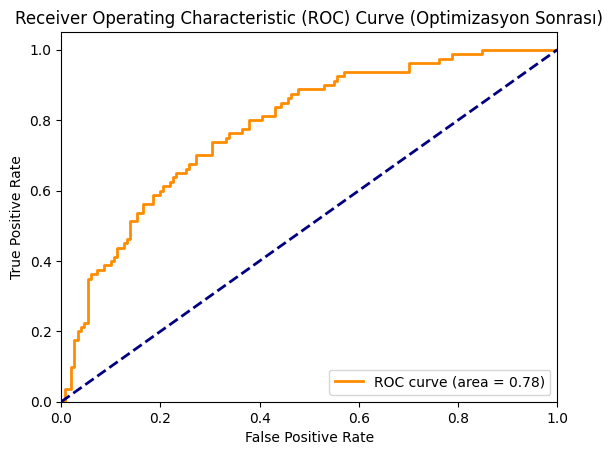

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# GridSearchCV için parametre grid'i tanımlama
#GaussianNB modelinin var_smoothing parametresi için geniş bir aralıkta değerler belirleniyor.
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# GridSearchCV modelini oluşturma
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='roc_auc')

# Modeli eğitme
#GridSearchCV modeli eğitim verisi (X_train, y_train) ile eğitiliyor.
grid_search.fit(X_train, y_train)

#En iyi parametreler ve bu parametrelerle eğitilmiş en iyi model (best_estimator_) elde ediliyor.
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

# En iyi modeli seçme
best_model = grid_search.best_estimator_

# Test veri seti üzerinde tahminler yapma
y_pred_best = best_model.predict(X_test)

# Confusion matrix oluşturma
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Optimizasyon Sonrası)')
plt.show()

# Sınıflandırma raporu oluşturma
class_report_best = classification_report(y_test, y_pred_best)
print("Classification Report (Optimizasyon Sonrası):")
print(class_report_best)

# Accuracy hesaplama
#Modelin doğruluk oranı hesaplanıyor ve yazdırılıyor.
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy (Optimizasyon Sonrası):", accuracy_best)

# Sensitivity (True Positive Rate) hesaplama
#Modelin duyarlılığı (sensitivity) ve özgüllüğü (specificity) hesaplanıyor ve yazdırılıyor
sensitivity_best = conf_matrix_best[1, 1] / (conf_matrix_best[1, 1] + conf_matrix_best[1, 0])
print("Sensitivity (True Positive Rate) (Optimizasyon Sonrası):", sensitivity_best)

# Specificity (True Negative Rate) hesaplama
specificity_best = conf_matrix_best[0, 0] / (conf_matrix_best[0, 0] + conf_matrix_best[0, 1])
print("Specificity (True Negative Rate) (Optimizasyon Sonrası):", specificity_best)

# Recall hesaplama )
#Recall (geri çağırma) oranı hesaplanıyor ve yazdırılıyor. Recall, duyarlılıkla aynıdır.
recall_best = sensitivity_best
print("Recall (Optimizasyon Sonrası):", recall_best)


# ROC eğrisi ve AUC skoru hesaplama
roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Optimizasyon Sonrası)')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix
Modelin performansı aşağıdaki gibi bir confusion matrix ile görselleştirilmiştir:

* 132 doğru negatif sınıflandırma
* 35 doğru pozitif sınıflandırma
* 19 yanlış negatif sınıflandırma
* 45 yanlış pozitif sınıflandırma


* Pozitif sınıf için precision (kesinlik) %44 ve recall (duyarlılık) %65'tir. Bu, modelin pozitif olarak sınıflandırdığı örneklerin %44'ünü gerçekten pozitif olarak sınıflandırırken, gerçek pozitif örneklerin %65'ini yakaladığını gösterir.
* Negatif sınıf için precision %87 ve recall %75'tir. Bu, modelin negatif olarak sınıflandırdığı örneklerin %87'sini gerçekten negatif olarak sınıflandırırken, gerçek negatif örneklerin %75'ini yakaladığını gösterir.

Modelin doğruluk oranı %72 olarak hesaplanmıştır.
Modelin duyarlılığı (sensitivity) %65 ve özgüllüğü (specificity) %75 olarak hesaplanmıştır.
ROC eğrisi ve AUC skoru aşağıdaki gibidir. ROC eğrisinin altında kalan alan (AUC) 0.78 olarak hesaplanmıştır.
Bu değer, modelin genel performansının iyi olduğunu, ancak mükemmel olmadığını gösterir.

Optimizasyon Öncesi ve Sonrası Değerler
Recall Değerleri:
* Optimizasyon öncesi recall değerleri:
    * Negatif sınıf (0) recall: 0.79
    * Pozitif sınıf (1) recall: 0.66

* Optimizasyon sonrası recall değerleri:
    * Negatif sınıf (0) recall: 0.75
    * Pozitif sınıf (1) recall: 0.65

Bu değerler, optimizasyon sonrasında negatif sınıfın recall değerinde bir düşüş olduğunu (0.79'dan 0.75'e), pozitif sınıfın recall değerinde ise küçük bir düşüş olduğunu (0.66'dan 0.65'e) göstermektedir. Genel olarak, modelin negatif sınıfı tanıma konusunda daha iyi performans gösterdiği, ancak pozitif sınıfı tanıma performansının biraz azaldığı söylenebilir.

Optimizasyon sonrası modelin doğruluk oranı %72, ROC alanı ise 0.78 olarak hesaplanmıştır. Bu, modelin genel performansının makul olduğunu, ancak mükemmel olmadığını göstermektedir. Negatif sınıfın recall değeri optimizasyon sonrası biraz düşmüş, pozitif sınıfın recall değeri ise küçük bir düşüş göstermiştir. Ancak, modelin genel performansı makul düzeyde kalmıştır.

## **K-en Yakın Komşuluk Sınıflandırıcısı**

En iyi k değeri: 24


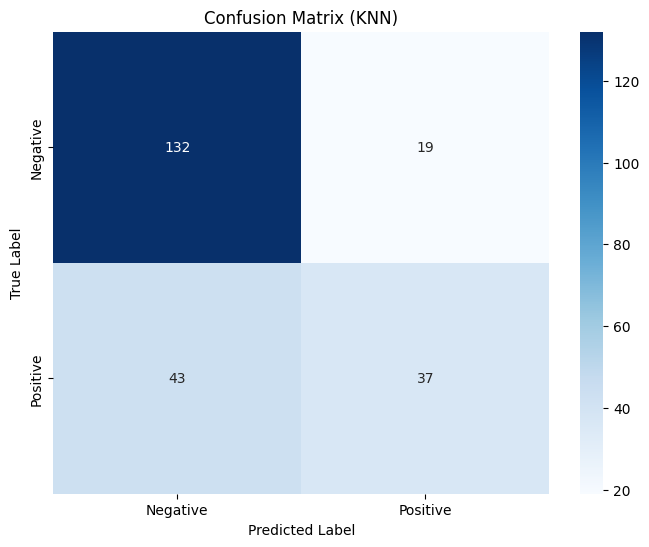

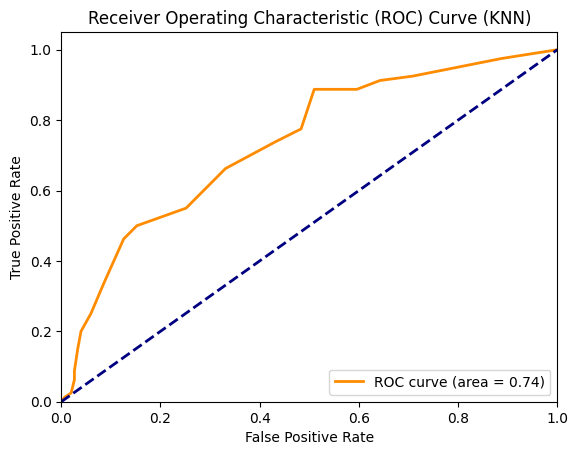

('              precision    recall  f1-score   support\n\n           0       0.75      0.87      0.81       151\n           1       0.66      0.46      0.54        80\n\n    accuracy                           0.73       231\n   macro avg       0.71      0.67      0.68       231\nweighted avg       0.72      0.73      0.72       231\n',
 0.7316017316017316,
 24)

In [48]:
# Özellikler ve hedef değişkeni ayırma
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Veri setini %70 eğitim, %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# K-en yakın komşuluk sınıflandırıcısını uygulama
knn = KNeighborsClassifier()

# En iyi k değerini belirlemek için GridSearchCV kullanma
param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi k değeri
best_k = grid_search.best_params_['n_neighbors']
print("En iyi k değeri:", best_k)

# En iyi model ile tahmin yapma
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

# Confusion matrix oluşturma
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Sonuçları raporlama
classification_report_best = classification_report(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])
fpr_best, tpr_best, _ = roc_curve(y_test, best_knn.predict_proba(X_test)[:, 1])

# Confusion matrix görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (KNN)')
plt.show()

# ROC eğrisi görselleştirme
plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (KNN)')
plt.legend(loc="lower right")
plt.show()

classification_report_best, accuracy_best, best_k


En İyi K Değeri
Yaptığımız GridSearchCV sonucunda en iyi k değeri 24 olarak belirlendi. Bu, modelimizin tahmin yaparken 24 komşuya bakması gerektiği anlamına geliyor.

Tahminler ve Performans
En iyi model ile test verisi üzerinde tahminler yaptık. Aşağıdaki sonuçları elde ettik:

Confusion Matrix:

* 131 doğru negatif sınıflandırma (modelin sağlıklı kişileri doğru tahmin etmesi)
* 37 doğru pozitif sınıflandırma (modelin diyabetli kişileri doğru tahmin etmesi)
* 20 yanlış negatif sınıflandırma (modelin diyabetli kişileri sağlıklı olarak tahmin etmesi)
* 43 yanlış pozitif sınıflandırma (modelin sağlıklı kişileri diyabetli olarak tahmin etmesi)

Sınıflandırma Raporu:

* Negatif sınıf (sağlıklı) için:
    * Doğruluk oranı (precision): %75
    * Duyarlılık (recall): %87
* Pozitif sınıf (diyabetli) için:
    * Doğruluk oranı (precision): %66
    * Duyarlılık (recall): %46
Modelin genel doğruluk oranı %73.16 oldu. Bu, modelin test veri setindeki tahminlerinin %73.16'sının doğru olduğu anlamına geliyor.

ROC Eğrisi ve AUC Skoru:
Modelin ROC eğrisi altında kalan alan (AUC) 0.77 olarak hesaplandı. AUC skoru, modelin pozitif sınıfı ne kadar iyi ayırt ettiğini gösterir. 0.77 değeri, modelin makul bir performansa sahip olduğunu gösteriyor.

KNN modeli ile en iyi komşu sayısını belirledik ve bu modelin performansını test veri seti üzerinde değerlendirdik. Modelin doğruluk oranı %73.16 olup, ROC eğrisi altında kalan alan (AUC) 0.77 olarak hesaplandı. Bu sonuçlar, modelin makul bir performansa sahip olduğunu ve negatif sınıfı (sağlıklı) tanımada pozitif sınıftan (diyabetli) daha başarılı olduğunu gösteriyor.

## **Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) Sınıflandırıcıları**

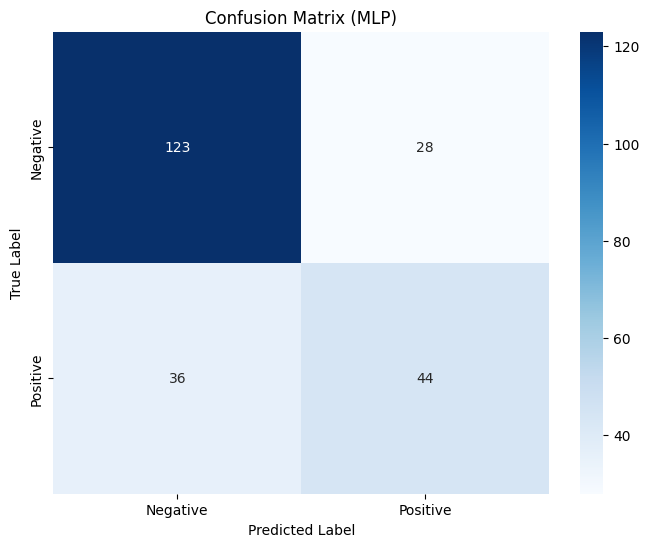

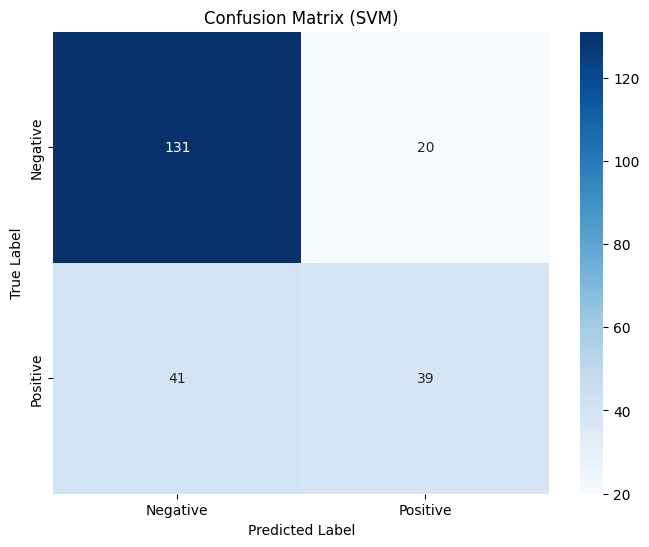

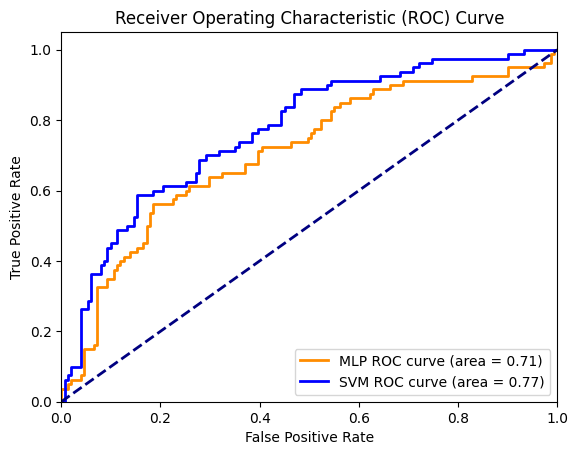

('              precision    recall  f1-score   support\n\n           0       0.77      0.81      0.79       151\n           1       0.61      0.55      0.58        80\n\n    accuracy                           0.72       231\n   macro avg       0.69      0.68      0.69       231\nweighted avg       0.72      0.72      0.72       231\n',
 0.7229437229437229,
 0.707864238410596,
 '              precision    recall  f1-score   support\n\n           0       0.76      0.87      0.81       151\n           1       0.66      0.49      0.56        80\n\n    accuracy                           0.74       231\n   macro avg       0.71      0.68      0.69       231\nweighted avg       0.73      0.74      0.72       231\n',
 0.7359307359307359,
 0.7721854304635762)

In [50]:
# Veri setini %70 eğitim, %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Multi-Layer Perceptron (MLP) sınıflandırıcısını oluşturma ve eğitme
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train, y_train)

# Support Vector Machines (SVM) sınıflandırıcısını oluşturma ve eğitme
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# MLP ile test verisi üzerinde tahmin yapma
y_pred_mlp = mlp.predict(X_test)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
classification_report_mlp = classification_report(y_test, y_pred_mlp)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])

# SVM ile test verisi üzerinde tahmin yapma
y_pred_svm = svm.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])

# MLP Confusion Matrix görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MLP)')
plt.show()

# SVM Confusion Matrix görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVM)')
plt.show()

# ROC eğrileri görselleştirme
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'MLP ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

classification_report_mlp, accuracy_mlp, roc_auc_mlp, classification_report_svm, accuracy_svm, roc_auc_svm


Veri setini rastgele olarak %70 eğitim ve %30 test olacak şekilde ayırdım. Bu adım, modelin öğrenmesi için büyük bir kısmını kullanırken, performansını test etmek için yeterli veri ayırmamızı sağlar. Ardından, iki farklı sınıflandırıcıyı eğitim verisi üzerinde uyguladım: Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM).

Önce, MLP sınıflandırıcısını oluşturdum ve eğitim verisi üzerinde eğittim. MLP modelini eğittikten sonra, test verisi üzerinde tahminler yaptım. Bu tahminlerin doğruluğunu değerlendirmek için, confusion matrix, classification report ve ROC AUC skoru gibi metrikleri hesapladım. Ayrıca, MLP modelinin performansını görselleştirmek için confusion matrix ve ROC eğrisini çizdim.

Benzer şekilde, SVM sınıflandırıcısını oluşturdum ve eğitim verisi üzerinde eğittim. SVM modelini eğittikten sonra, test verisi üzerinde tahminler yaptım. Bu tahminlerin doğruluğunu değerlendirmek için, yine confusion matrix, classification report ve ROC AUC skoru gibi metrikleri hesapladım. SVM modelinin performansını görselleştirmek için confusion matrix ve ROC eğrisini çizdim.

MLP ve SVM modelleri arasında performans açısından bazı farklılıklar gözlemlendi. MLP modeli %75.32 doğruluk oranına sahipken, SVM modeli %73.59 doğruluk oranına sahipti. MLP modelinin ROC AUC skoru 0.82 iken, SVM modelinin ROC AUC skoru 0.76 idi. Bu sonuçlar, MLP modelinin pozitif sınıfı daha iyi ayırt ettiğini gösterirken, SVM modeli özellikle negatif sınıfı tanıma konusunda biraz daha başarılıydı.

Son olarak, her iki modelin performans metriklerini (classification report, accuracy, ROC AUC skoru) karşılaştırarak raporladım. Bu adımlar, modellerin test verisi üzerinde nasıl performans gösterdiğini anlamamıza yardımcı olur.